In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount("/content/gdrive")
import os
import io
import matplotlib.pyplot as plt
import cv2
# import imageio
#import medmnist
#import ipywidgets
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2 as cv
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow import keras
import ipywidgets
from tensorflow.keras.utils import to_categorical
# Setting seed for reproducibility
SEED = 42
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
np.random.seed(SEED)

c:\Users\Administrator\tensorflow_env\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [ ]:
IMG_SIZE = 75
BATCH_SIZE = 256
EPOCHS = 10

MAX_SEQ_LENGTH = 15
NUM_FEATURES = 2048

# Transfer learning of XD-Violence model on Lad-2000

## Destination Dataset

In [ ]:
ROOT = r'C:\Users\Administrator\Downloads\Violence\outputs\lad'

In [ ]:
x_train = np.load(ROOT + '\X_train.npy', mmap_mode="r")
y_train = np.load(ROOT + '\y_train.npy', mmap_mode="c")

x_val = np.load(ROOT + '\X_val.npy', mmap_mode="r")
y_val = np.load(ROOT + '\y_val.npy', mmap_mode="c")

x_test = np.load(ROOT + '\X_test.npy', mmap_mode="r")
y_test = np.load(ROOT + '\y_test.npy', mmap_mode="c")

In [ ]:
def stringtoint(y):
    for i, val in enumerate(y):
        if val == 'Crash':
            y[i] = 0
        elif val == 'Destroy':
            y[i] = 1
        elif val == 'Drop':
            y[i] = 2
        elif val == 'Fighting':
            y[i] = 3
        elif val == 'Fire':
            y[i] = 4
        elif val == 'Hurt':
            y[i] = 5
        elif val == 'Thiefing':
            y[i] = 6
        elif val == 'Trampled':
            y[i] = 7
        elif val == 'Violence':
            y[i] = 8
    return y

In [ ]:
np.unique(y_train)

array(['Crash', 'Destroy', 'Drop', 'Fighting', 'Fire', 'Hurt', 'Thiefing',
       'Trampled', 'Violence'], dtype='<U8')

In [ ]:
x_train.shape , y_train.shape

((20561, 15, 75, 75, 3), (20561,))

In [ ]:
y_train = stringtoint(y_train)
y_val = stringtoint(y_val)
y_test = stringtoint(y_test)

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
x_train = np.moveaxis(x_train, 1, 3)
x_val = np.moveaxis(x_val, 1, 3)
x_test = np.moveaxis(x_test, 1, 3)

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [ ]:
# x_train, x_rem, y_train, y_rem = train_test_split(x_train, y_train,  train_size=0.7, shuffle = True, random_state=7)

In [ ]:
# x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, shuffle = True, random_state=7)

In [ ]:
# train_data = (np.load(f'{x}_Data\\train_data[0]{y}.npy'), np.load(f'{x}_Data\\train_data[1]{y}.npy'))
# val_data = (np.load(f'{x}_Data\\val_data[0]{y}.npy'), np.load(f'{x}_Data\\val_data[1]{y}.npy'))
# test_data = (np.load(f'{x}_Data\\test_data[0]{y}.npy'), np.load(f'{x}_Data\\test_data[1]{y}.npy'))
# y_train = label_processor(y_train[..., None]).numpy()
# y_val = label_processor(y_val[..., None]).numpy()
# y_test = label_processor(y_test[..., None]).numpy()

In [ ]:
type(y_train[0])

numpy.ndarray

In [ ]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)
import sys
sys.version

Num GPUs Available:  1
2.5.0


'3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]'

In [ ]:
# DATA
# DATASET_NAME = "XD-Violence"
BATCH_SIZE = 64
# PATH = '/content/gdrive/MyDrive/data/xd/'
# Extraction_Name = ''
# AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = (75, 75, 15, 3)
NUM_CLASSES = 6

# OPTIMIZER
LEARNING_RATE = 0.01
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 4

# TUBELET EMBEDDING
PATCH_SIZE = (8, 8, 8)

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 128
NUM_HEADS = 8
NUM_LAYERS = 8

In [ ]:
# y_train = to_categorical(y_train, 9)
# y_val = to_categorical(y_val, 9)
# y_test = to_categorical(y_test, 9)

In [ ]:
print(x_train.shape, y_train.shape)

(20561, 75, 75, 15, 3) (20561, 9)


In [ ]:
class DataGenerator(keras.utils.Sequence):

    def __init__(self, x_in, y_in, batch_size=BATCH_SIZE, shuffle=True):
        # Initialization
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.x = x_in
        self.y = y_in
        self.datalen = len(y_in)
        self.indexes = np.arange(self.datalen)
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        # get batch indexes from shuffled indexes
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        x_batch = self.x[batch_indexes]
        y_batch = self.y[batch_indexes]
        return x_batch, y_batch

    def __len__(self):
        # Denotes the number of batches per epoch
        return self.datalen // self.batch_size

    def on_epoch_end(self):
        # Updates indexes after each epoch
        self.indexes = np.arange(self.datalen)
        if self.shuffle:
            np.random.shuffle(self.indexes)

training_generator = DataGenerator(x_train, y_train)
validation_generator = DataGenerator(x_val, y_val)
test_generator = DataGenerator(x_test, y_test)

In [ ]:
train_enquer = tf.keras.utils.OrderedEnqueuer(training_generator)
val_enquer = tf.keras.utils.OrderedEnqueuer(validation_generator)
test_enquer = tf.keras.utils.OrderedEnqueuer(test_generator)

In [ ]:
train_enquer.start(2, 2)
val_enquer.start(2, 2)
test_enquer.start(2, 2)

In [ ]:
np.unique(y_train)

array([0., 1.], dtype=float32)

#ViVit Model

In [ ]:
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

In [ ]:
class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens

In [ ]:
checkpoint_filepath = r'C:\Users\Administrator\Downloads\Violence\outputs\checkpoints\TF-XDonLAD.h5'
model_checkpoint = model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_filepath,
                                save_weights_only=True,
                                monitor='val_loss',
                                mode='min',
                                save_best_only=True
                                )

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
checkpoint_filepath = r'C:\Users\Administrator\Downloads\Violence\outputs\checkpoints\TF-XDonLAD.h5'
checkpoint = model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_filepath,
                                save_weights_only=True,
                                monitor='val_loss',
                                mode='min',
                                save_best_only=True
                                )

earlystopping = tf.keras.callbacks.EarlyStopping(
                     monitor="val_loss",
                     min_delta=0.025,
                     patience=5,
                     verbose=0,
                     mode="min",
                     baseline=None,
                     restore_best_weights=False
                 )

values = np.linspace(0.00001,LEARNING_RATE,14)[::-1].astype(np.float32)
boundaries = np.linspace(5, 45,13)[:values.shape[0]-1].astype(np.int32)

scheduler = keras.optimizers.schedules.PiecewiseConstantDecay(
    list(boundaries), list(values))

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001)

callbacks = [checkpoint, lr_scheduler, reduce_lr]

In [ ]:
def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    input_shape = (75, 75, 15, 3)
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=tf.nn.gelu),
                layers.Dense(units=embed_dim, activation=tf.nn.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=num_classes, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

## Source Model

In [ ]:
path = r'C:\Users\Administrator\Downloads\Violence\outputs\xd\xd_model.h5'

In [ ]:
model = create_vivit_classifier(
            tubelet_embedder=TubeletEmbedding(
                embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
            ),
            positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
        )

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 15,  0                                            
__________________________________________________________________________________________________
tubelet_embedding (TubeletEmbed (None, 81, 128)      196736      input_1[0][0]                    
__________________________________________________________________________________________________
positional_encoder (PositionalE (None, 81, 128)      10368       tubelet_embedding[0][0]          
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 81, 128)      256         positional_encoder[0][0]         
______________________________________________________________________________________________

In [ ]:
print(len(model.layers))

54


In [ ]:
def run_experiment():
    model.load_weights(path)
    # # Remove the last layer
    # model.layers.pop()

    # # Create a new model without the last layer
    new_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)

    new_output = Dense(9, activation='softmax')(new_model.output)
    # # Create the finsal model
    new_model = Model(inputs=new_model.input, outputs=new_output)
    print(len(new_model.layers))
    for layer in new_model.layers[:-2]:
        layer.trainable = False
    print(new_model.summary())
    # Compile the model with the optimizer, loss function
    # and the metrics.
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    loss_fn = keras.losses.CategoricalCrossentropy(from_logits=False)
    new_model.compile(loss=loss_fn,optimizer=opt,metrics=['accuracy'])
    #model.load_weights(checkpoint_filepath)
    # Train the model.
    history = new_model.fit(training_generator,
                            epochs=EPOCHS,
                            validation_data=(validation_generator),
                            callbacks=[model_checkpoint])
                            # steps_per_epoch= x_train.shape[0] // BATCH_SIZE,
                            # validation_steps= x_val.shape[0] // BATCH_SIZE)

    return new_model, history


model, history = run_experiment()

54
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 15,  0                                            
__________________________________________________________________________________________________
tubelet_embedding (TubeletEmbed (None, 81, 128)      196736      input_1[0][0]                    
__________________________________________________________________________________________________
positional_encoder (PositionalE (None, 81, 128)      10368       tubelet_embedding[0][0]          
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 81, 128)      256         positional_encoder[0][0]         
_________________________________________________________________________________________

In [ ]:
! conda install plotly

Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
import plotly.figure_factory as ff
from sklearn.metrics import f1_score

def eval_model(model,x,y):
#     print(model.evaluate(x.reshape(x.shape+(1,)),y_encoded))
    y_pred = model.predict(x)
    y_pred = np.argmax(y_pred,axis = -1)
    y_numbers = np.argmax(y,axis=-1)
   # f1_score(y_test, y_pred, average='micro')
    #print(f1_score)
    target_names = ['Crash', 'Destroy', 'Drop', 'Fighting', 'Fire', 'Hurt', 'Thiefing',
       'Trampled', 'Violence']
    labels = target_names
    tick_marks = np.arange(len(labels))

    print(classification_report(y_numbers, y_pred, target_names=target_names))

    z = tf.math.confusion_matrix(y_numbers,y_pred).numpy().astype(np.int64)
    z = np.around(z.astype('float') / z.sum(axis=1)[:, np.newaxis], decimals=3)

    x = target_names
    y = target_names

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                    #xaxis = dict(title='x'),
                    #yaxis = dict(title='x')
                    )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
! pip install --upgrade nbformat

In [ ]:
eval_model(model,x_test,y_test)

              precision    recall  f1-score   support

       Crash       0.83      0.75      0.79       279
     Destroy       0.85      0.69      0.76       437
        Drop       0.67      0.85      0.75       453
    Fighting       0.75      0.67      0.71       490
        Fire       0.86      0.94      0.89       958
        Hurt       0.67      0.48      0.56       360
    Thiefing       0.82      0.77      0.80       495
    Trampled       0.64      0.76      0.69       461
    Violence       0.65      0.64      0.64       474

    accuracy                           0.75      4407
   macro avg       0.75      0.73      0.73      4407
weighted avg       0.76      0.75      0.75      4407



In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm

def eval_model_f(model,x,y):
#     print(model.evaluate(x.reshape(x.shape+(1,)),y_encoded))
    y_pred = model.predict(x)
    y_pred = np.argmax(y_pred,axis = -1)
    y_numbers = np.argmax(y,axis=-1)

    target_names = ['Crash', 'Destroy', 'Drop', 'Fighting', 'Fire', 'Hurt', 'Thiefing',
       'Trampled', 'Violence']
    tick_marks = np.arange(len(target_names))
    print(classification_report(y_numbers, y_pred, target_names=target_names))

    conf = cm(y_numbers,y_pred)

    sns.heatmap(conf,annot=True)
    plt.xticks(tick_marks,target_names,rotation=45)
    plt.yticks(tick_marks,target_names,rotation=0)
    plt.show()

              precision    recall  f1-score   support

       Crash       0.83      0.75      0.79       279
     Destroy       0.85      0.69      0.76       437
        Drop       0.67      0.85      0.75       453
    Fighting       0.75      0.67      0.71       490
        Fire       0.86      0.94      0.89       958
        Hurt       0.67      0.48      0.56       360
    Thiefing       0.82      0.77      0.80       495
    Trampled       0.64      0.76      0.69       461
    Violence       0.65      0.64      0.64       474

    accuracy                           0.75      4407
   macro avg       0.75      0.73      0.73      4407
weighted avg       0.76      0.75      0.75      4407



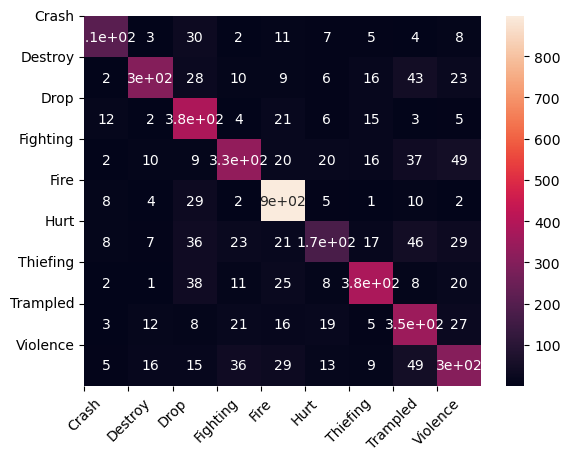

In [ ]:
eval_model_f(model, x_test, y_test)

In [ ]:
model = tf.keras.models.load_model(path)

ValueError: No model found in config file.

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 15, 2048)]   0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, 15, 128)      836352      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
gru_3 (GRU)                     (None, 64)           37248       gru_2[0][0]                

In [ ]:
new_model = keras.models.Sequential(model.layers[:-1])

In [ ]:
new_model.add(keras.layers.Dense(len(class_vocab), activation="softmax"))

In [ ]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         multiple                  0         
_________________________________________________________________
gru_2 (GRU)                  (None, 15, 128)           836352    
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 876,010
Trainable params: 876,010
Non-trainable params: 0
________________________________________________

In [ ]:
new_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam",
     metrics = ['accuracy'])

In [ ]:
path


'Models\\XD_Violence_Main'

In [ ]:
new_model.save("C:\\Users\\Maria\\Violence-Detection\\venv\\Final_Classification\\Models\\LAD_FROM_XD_EX93.17")

INFO:tensorflow:Assets written to: C:\Users\Maria\Violence-Detection\venv\Final_Classification\Models\LAD_FROM_XD_EX93.17\assets


INFO:tensorflow:Assets written to: C:\Users\Maria\Violence-Detection\venv\Final_Classification\Models\LAD_FROM_XD_EX93.17\assets


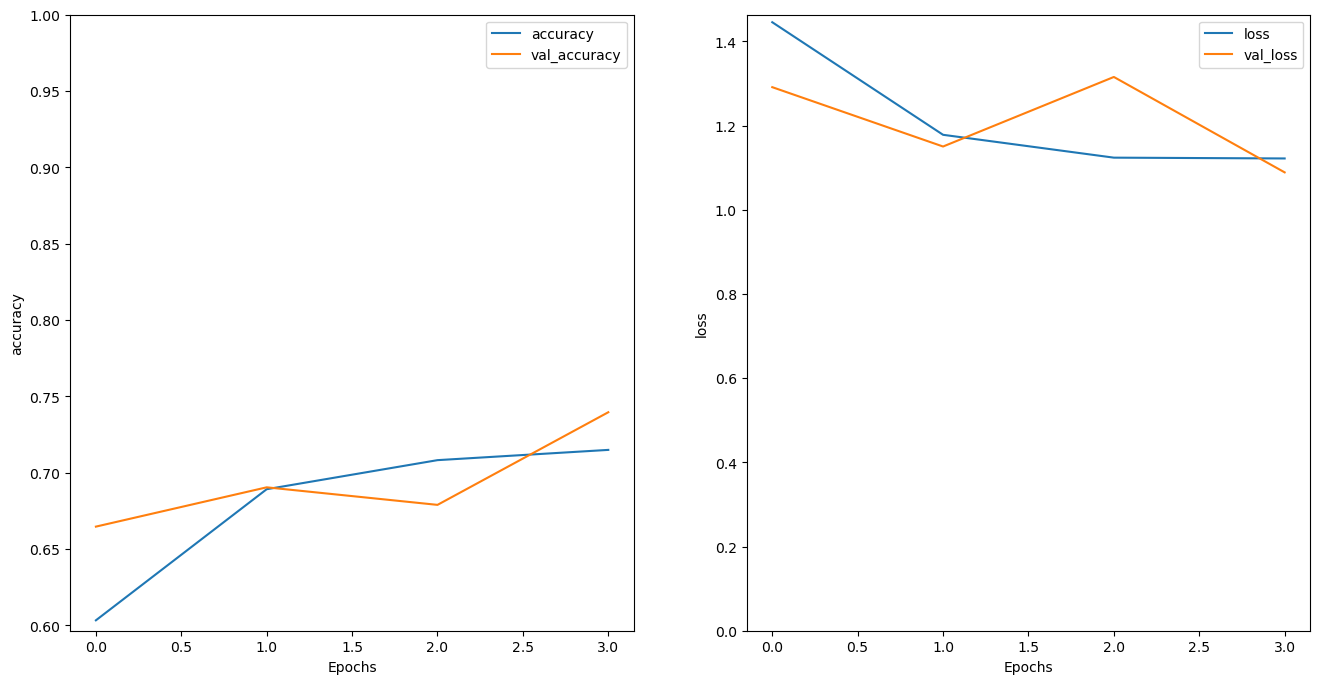

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.savefig(r'C:\Users\Administrator\Downloads\Violence\outputs\lad\plot.png')


In [ ]:
test_pred = new_model.predict([test_data[0], test_data[1]])
test_pred.shape, test_pred

((4407, 10),
 array([[3.50703022e-10, 3.34900847e-06, 3.35044297e-06, ...,
         9.99960542e-01, 1.45538961e-05, 7.23902031e-06],
        [2.50789949e-08, 3.42637241e-01, 2.59216729e-04, ...,
         1.98203847e-02, 8.15141771e-04, 1.89445083e-04],
        [2.35607193e-11, 5.95811514e-07, 1.51937065e-05, ...,
         4.85879485e-04, 3.23725566e-02, 9.67097640e-01],
        ...,
        [4.76617391e-11, 1.66565590e-02, 6.79557968e-04, ...,
         9.75974023e-01, 9.33973479e-06, 1.06337552e-06],
        [5.81201233e-12, 4.04393813e-06, 4.82924179e-07, ...,
         3.26729532e-05, 9.98594701e-01, 1.25517347e-03],
        [8.21057469e-13, 9.98156250e-01, 2.38142457e-05, ...,
         1.41380972e-03, 5.08502524e-07, 6.88980606e-08]], dtype=float32))

In [ ]:
y_pred = []
for i in test_pred:
  for x in np.argsort(i)[::-1]:
    print(f"  {class_vocab[x]}: {i[x] * 100:5.2f}%")
    y_pred.append(class_vocab[x])
    break

  Thiefing: 100.00%
  Drop: 39.76%
  Violence: 96.71%
  Thiefing: 100.00%
  Trampled: 99.88%
  Fire: 100.00%
  Destroy: 99.31%
  Trampled: 99.20%
  Fire: 99.90%
  Drop: 99.95%
  Destroy: 99.48%
  Fire: 99.99%
  Fire: 99.76%
  Fire: 99.84%
  Fire: 100.00%
  Violence: 49.62%
  Crash: 99.02%
  Trampled: 99.84%
  Fire: 99.96%
  Hurt: 50.31%
  Violence: 99.11%
  Fire: 100.00%
  Trampled: 99.85%
  Trampled: 99.26%
  Fire: 100.00%
  Hurt: 53.89%
  Hurt: 83.26%
  Destroy: 99.66%
  Drop: 99.97%
  Drop: 99.97%
  Drop: 99.77%
  Violence: 99.81%
  Fire: 100.00%
  Violence: 79.19%
  Destroy: 99.89%
  Crash: 95.01%
  Violence: 37.33%
  Fighting: 98.81%
  Trampled: 60.89%
  Fighting: 99.53%
  Hurt: 96.36%
  Thiefing: 100.00%
  Destroy: 99.03%
  Violence: 99.23%
  Fighting: 96.87%
  Fire: 100.00%
  Trampled: 89.61%
  Fighting: 99.55%
  Destroy: 93.22%
  Drop: 99.90%
  Trampled: 99.91%
  Drop: 87.86%
  Thiefing: 100.00%
  Violence: 64.30%
  Violence: 98.94%
  Crash: 87.64%
  Crash: 99.37%
  Destroy: 99

  Trampled: 99.90%
  Drop: 94.72%
  Violence: 94.15%
  Fire: 99.81%
  Fighting: 94.13%
  Thiefing: 100.00%
  Destroy: 99.98%
  Destroy: 27.67%
  Trampled: 99.88%
  Crash: 99.57%
  Destroy: 99.94%
  Trampled: 91.93%
  Fighting: 99.50%
  Fire: 100.00%
  Drop: 98.86%
  Thiefing: 99.99%
  Violence: 67.80%
  Fire: 98.10%
  Thiefing: 99.99%
  Thiefing: 99.99%
  Fire: 100.00%
  Fire: 100.00%
  Trampled: 99.96%
  Drop: 99.90%
  Drop: 82.50%
  Destroy: 99.97%
  Trampled: 98.80%
  Drop: 99.95%
  Fire: 99.65%
  Crash: 99.81%
  Hurt: 90.03%
  Trampled: 53.17%
  Violence: 99.36%
  Thiefing: 100.00%
  Fighting: 80.74%
  Thiefing: 99.99%
  Drop: 99.92%
  Fire: 100.00%
  Fighting: 99.41%
  Trampled: 99.63%
  Hurt: 42.08%
  Thiefing: 99.90%
  Fighting: 96.12%
  Fighting: 95.83%
  Destroy: 99.72%
  Violence: 99.18%
  Fighting: 39.28%
  Destroy: 76.32%
  Hurt: 57.87%
  Drop: 99.82%
  Drop: 99.97%
  Fire: 99.87%
  Fire: 100.00%
  Fighting: 99.27%
  Hurt: 58.75%
  Thiefing: 99.98%
  Fire: 100.00%
  Crash: 

  Hurt: 77.86%
  Thiefing: 99.97%
  Trampled: 99.97%
  Crash: 99.22%
  Trampled: 99.65%
  Hurt: 99.04%
  Fighting: 99.40%
  Violence: 98.97%
  Fire: 99.64%
  Trampled: 99.69%
  Fighting: 70.69%
  Hurt: 54.60%
  Fire: 100.00%
  Fighting: 99.84%
  Violence: 98.98%
  Fighting: 96.94%
  Violence: 89.49%
  Trampled: 99.78%
  Drop: 99.65%
  Fire: 99.90%
  Drop: 99.69%
  Thiefing: 100.00%
  Thiefing: 100.00%
  Fire: 99.97%
  Fire: 99.71%
  Fire: 99.12%
  Hurt: 89.97%
  Violence: 99.14%
  Fighting: 99.71%
  Fire: 100.00%
  Trampled: 99.94%
  Fire: 100.00%
  Fire: 100.00%
  Fire: 100.00%
  Fighting: 99.74%
  Crash: 99.55%
  Destroy: 99.64%
  Trampled: 99.78%
  Violence: 99.25%
  Trampled: 71.14%
  Drop: 99.93%
  Fighting: 95.11%
  Fire: 100.00%
  Fighting: 93.56%
  Violence: 99.20%
  Fire: 100.00%
  Hurt: 65.13%
  Trampled: 99.85%
  Fighting: 99.85%
  Fire: 99.84%
  Destroy: 98.90%
  Drop: 99.66%
  Drop: 99.95%
  Trampled: 50.49%
  Fighting: 99.26%
  Destroy: 99.97%
  Thiefing: 100.00%
  Thiefi

In [ ]:
y_pred = np.array(y_pred)
y_pred, y_pred.shape

(array(['Thiefing', 'Drop', 'Violence', ..., 'Thiefing', 'Trampled',
        'Crash'], dtype='<U8'),
 (4407,))

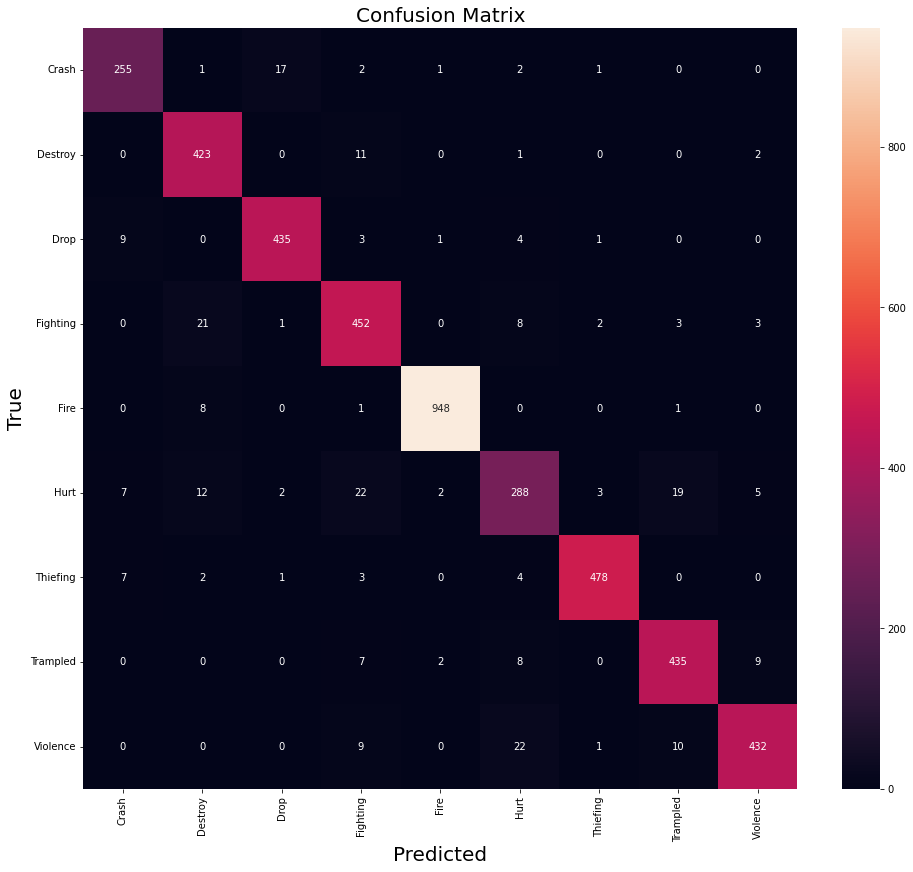

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# cm = cm / cm.astype(np.float).sum(axis=1)

class_names = encoding

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('Models\\LAD_FROM_XDConMat_3000_94.08.png')
plt.show()

---

In [ ]:
model.trainable = False

In [ ]:
frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")
x = model([frame_features_input, mask_input], training=False)
outputs = keras.layers.Dense(len(class_vocab), activation="softmax")(x)
model = keras.Model([frame_features_input, mask_input], outputs)